In [7]:
import scipy.integrate
import numpy
import matplotlib.pyplot
import os
import json
import scipy.interpolate
#for partial specialization
import cModel
import importlib
importlib.reload(cModel)
import time
import ivp
importlib.reload(ivp)
import runSolver
importlib.reload(runSolver)

  
#run solver
fh=os.path.expanduser('~')
i=0
setups={}
a={}
a['jobDir']=os.path.join(fh,'temp','humanHG')
a['modelFile']=os.path.join(fh,'software','src','PBPK','models','humanHG.json')
a['parameterFile']=os.path.join(fh,'software','src','PBPK','models','humanHG_parameters1.json')
setups['humanHG']=a
b={}
b['jobDir']=os.path.join(fh,'temp','humanHGplusI')
b['modelFile']=os.path.join(fh,'software','src','PBPK','models','humanHGplusI.json')
b['parameterFile']=os.path.join(fh,'software','src','PBPK','models','humanHGplusI_parameters.json')
#setups['humanHGplusI']=b
#select=setups['humanHGplusI']
#select=setups['humanHGplusI']

for x in setups:
    select=setups[x]
    if i>0: 
        targetDir=select['jobDir']+'{}'.format(i)
    else:
        targetDir=select['jobDir']
    if i==1:
        srcDir=select['jobDir']
    if i>1:
        srcDir=select['jobDir']+'{}'.format(i-1)

    if not os.path.isdir(targetDir):
        os.mkdir(targetDir)

    setupFileSrc=os.path.join(fh,'software','src','PBPK','setup','setupFast.json')
    setupFile=os.path.join(targetDir,'setupFast.json')

    with open(setupFileSrc,'r') as f:
        setup=json.load(f)
    setup['tmax']=i+1
    with open(setupFile,'w+') as f:
        f.write(json.dumps(setup))

    if i>0:
        runSolver.main([setupFile,select['modelFile'],select['parameterFile']],targetDir,srcDir)
    if i==0:
        runSolver.main([setupFile,select['modelFile'],select['parameterFile']],targetDir)


#t0,y0,S1,lut,lutSE=runSolver.getStartPoint(setup)


Using /home/studen/temp/humanHG
Using solution from None
t0=0
t0 0 tmax 60.0
At t=32.60
Done simultaneous LSODA SE
Time: 5.633 s
Completed step 
Completed run
Writing /home/studen/temp/humanHG/model.json
Writing /home/studen/temp/humanHG/parameters.json


In [229]:
humanHG=os.path.join(fh,'temp','humanHG')
humanHGplusI=os.path.join(fh,'temp','humanHGplusI')
t,sol,se,sOut,qt,lut,lutSE,setup1=runSolver.loadSolutionFromDir(humanHG)
print(len(t))

201


In [82]:
importlib.reload(cModel)
importlib.reload(ivp)
importlib.reload(runSolver)

model=cModel.model()
#sys.parse(os.path.join(fh,'software','src','Integra','models','cDiazepam.json'))
setupFile=os.path.join(fh,'software','src','PBPK','setup','setupFastStride.json')
modelFile=os.path.join(fh,'software','src','PBPK','models','humanHG.json')
parameterFile=os.path.join(fh,'software','src','PBPK','models','humanHG_parameters1.json')
model.parse(modelFile,parameterFile)
#model.inspect()
model.Su(3)[model.lutSE['intestineVolumeFraction'],model.lut['intestine']]
print(model.lut)
model.getVolume()




{'redBloodCells': 0, 'plasma': 1, 'venous': 2, 'kidney': 3, 'urine': 4, 'richlyPerfused': 5, 'fat': 6, 'slowlyPerfused': 7, 'hair': 8, 'brainBlood': 9, 'brain': 10, 'liver': 11, 'gut': 12, 'intestine': 13, 'feces': 14, 'inorganicMercury': 15, 'total': 16}


array([ 1.62648,  0.81324,  0.81324,  0.27108,  1.     ,  6.777  ,
       18.50121, 23.7195 ,  1.     ,  0.47439,  1.3554 ,  1.76202,
        1.15209,  0.94878,  1.     ,  1.     ,  1.     ])

In [ ]:
model=cModel.model()
fh=os.path.expanduser('~')
#sys.parse(os.path.join(fh,'software','src','Integra','models','cDiazepam.json'))
setupFile=os.path.join(fh,'software','src','PBPK','setup','setupFast.json')
#modelFile=os.path.join(fh,'software','src','PBPK','models','humanHGplusI.json')
#parameterFile=os.path.join(fh,'software','src','PBPK','models','humanHGplusI_parameters.json')
modelFile=os.path.join(fh,'software','src','PBPK','models','humanHG.json')
parameterFile=os.path.join(fh,'software','src','PBPK','models','humanHG_parameters1.json')
model.parse(modelFile,parameterFile)
setup=runSolver.parseSetup(setupFile)
tscale=runSolver.getScale(setup)

model.inspect()    

print("***********done************")
print(model.M(1).shape)
#print(sys.fSS(2))
print(model.m)

nt=setup['nt']
qtmax=24*60*365*10
qt=numpy.linspace(0,qtmax,nt)
#ft=[fw['derivatives']['fetusGrowthDuration'](x) for x in qt]
try:
    fw=model.get('fetusWeight')
    ft=[fw['value'](x) for x in qt]
    matplotlib.pyplot.plot(qt/tscale,ft)
except (KeyError,TypeError):
    pass

try:
    hw=model.get('hairVolume')
    ht=[10*hw['value'](x) for x in qt]
    matplotlib.pyplot.plot(qt/tscale,ht)
except (KeyError,TypeError):
    pass
start_time=time.time()
for i in range(100000):
    model.M(1e7)
end_time=time.time()
print('Time: {:.3f} s'.format(end_time-start_time))
print(sys.M(1000)[8,:])

Parsing [1/1]
Parsing [1/1]
[0.994304   0.99428806 0.99427213 0.9942562  0.99424029 0.99422438
 0.99420847 0.99419258 0.99417669 0.9941608  0.99414493 0.99412906
 0.99411319 0.99409734 0.99408149 0.99406565 0.99404981 0.99403398
 0.99401816 0.99400234 0.99398654 0.99397073 0.99395494 0.99393915
 0.99392337 0.99390759 0.99389182 0.99387606 0.99386031 0.99384456
 0.99382882 0.99381308 0.99379735 0.99378163 0.99376592 0.99375021
 0.99373451 0.99371881 0.99370313 0.99368744 0.99367177 0.9936561
 0.99364044 0.99362479 0.99360914 0.9935935  0.99357786 0.99356223
 0.99354661 0.993531   0.99351539 0.99349979 0.99348419 0.99346861
 0.99345302 0.99343745 0.99342188 0.99340632 0.99339076 0.99337522
 0.99335967 0.99334414 0.99332861 0.99331309 0.99329757 0.99328206
 0.99326656 0.99325107 0.99323558 0.99322009 0.99320462 0.99318915
 0.99317369 0.99315823 0.99314278 0.99312734 0.9931119  0.99309647
 0.99308105 0.99306563 0.99305022 0.99303482 0.99301942 0.99300403
 0.99298865 0.99297327 0.9929579  0

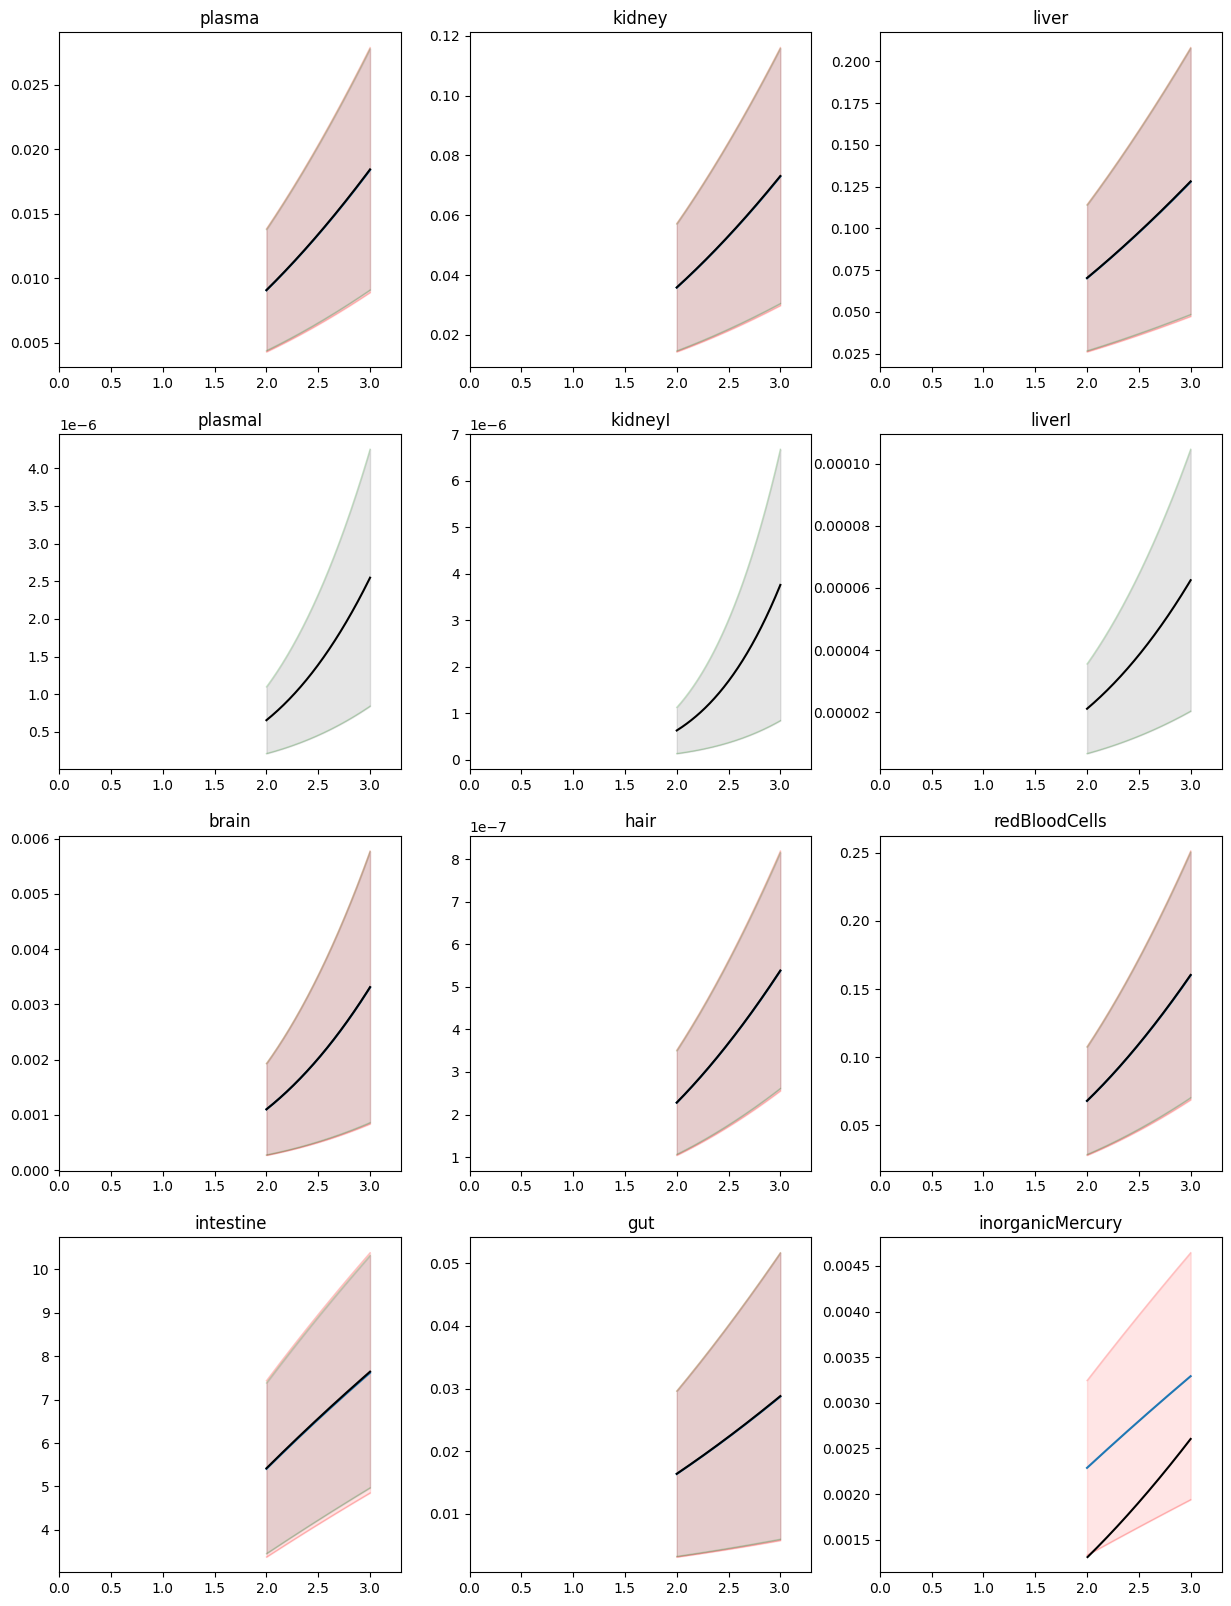

In [122]:
i=2
# #copy output of Thompson et al1
# merge solutions
d=setups['humanHG']['jobDir']+'{}'.format(i)
d1=setups['humanHGplusI']['jobDir']+'{}'.format(i)
t,sol,se,sOut,qt,lut,lutSE,setup0=runSolver.loadSolutionFromDir(d,True)
t1,sol1,se1,sOut1,qt1,lut1,lutSE1,setup1=runSolver.loadSolutionFromDir(d1,True)
model=cModel.model()
model.parse(setups['humanHG']['modelFile'],setups['humanHG']['parameterFile'])
model1=cModel.model()
model1.parse(setups['humanHGplusI']['modelFile'],setups['humanHGplusI']['parameterFile'])

fig, axs = matplotlib.pyplot.subplots(4, 3,figsize=(15,20))
name=['plasma','kidney','liver',
      'plasmaI','kidneyI','liverI',
      'brain','hair','redBloodCells',
     'intestine','gut','inorganicMercury'
      ]

m=model.getVolumes()
m1=model1.getVolumes()
print(numpy.dot(sol[1:,:-1],m[:-1])/sol[1:,-1])
print(numpy.dot(sol1[1:,:-1],m1[:-1])/sol1[1:,-1])

#generate total inorganic from plusI model
iList=['liverI','plasmaI','kidneyI','brainI','fecesI','urine','hairI']
iM=numpy.zeros((model1.n))
for x in iList:
    iM[model1.lut[x]]=model1.getVolume(x) 
#scaled total inorganic mercury
iTotal=200*numpy.dot(sol1[1:,:],iM)/sol1[1:,-1]   
print(iTotal)

tscale=runSolver.getScale(setup1)
tmax=setup1['tmax']*tscale
print(tscale)
max=[-1]*len(name)
for i in range(len(name)):
    row=i//3
    col=i%3
    ax=axs[row,col]
    try:
        fy=sol[:,lut[name[i]]]
        fe=se[:,lut[name[i]]]
        ax.plot(t/tscale,fy)
        ax.fill_between(t/tscale, fy-fe, fy + fe, color='red',alpha=0.1)
        ax.plot(t/tscale,fy-fe,color='red',linewidth=1,alpha=0.2)
        ax.plot(t/tscale,fy+fe,color='red',linewidth=1,alpha=0.2)
    except KeyError:
        pass
    try:
        fy1=sol1[:,lut1[name[i]]]
        fe1=se1[:,lut1[name[i]]]
        ax.plot(t1/tscale,fy1,color='black')
        ax.fill_between(t1/tscale, fy1-fe1, fy1 + fe1, color='black',alpha=0.1)
        ax.plot(t1/tscale,fy1-fe1,color='green',linewidth=1,alpha=0.2)
        ax.plot(t1/tscale,fy1+fe1,color='green',linewidth=1,alpha=0.2)
    except (NameError,KeyError):
        if name[i]=='inorganicMercury':
            fy1=iTotal
            ax.plot(t1[1:]/tscale,fy1,color='black')
        
    if max[i]>0:
        axs[row,col].set_ylim([0,max[i]])
    axs[row,col].set_xlim([0,1.1*tmax/tscale])
    axs[row,col].set_title(name[i])

Parsing [1/1]
Key oralIngestion not found


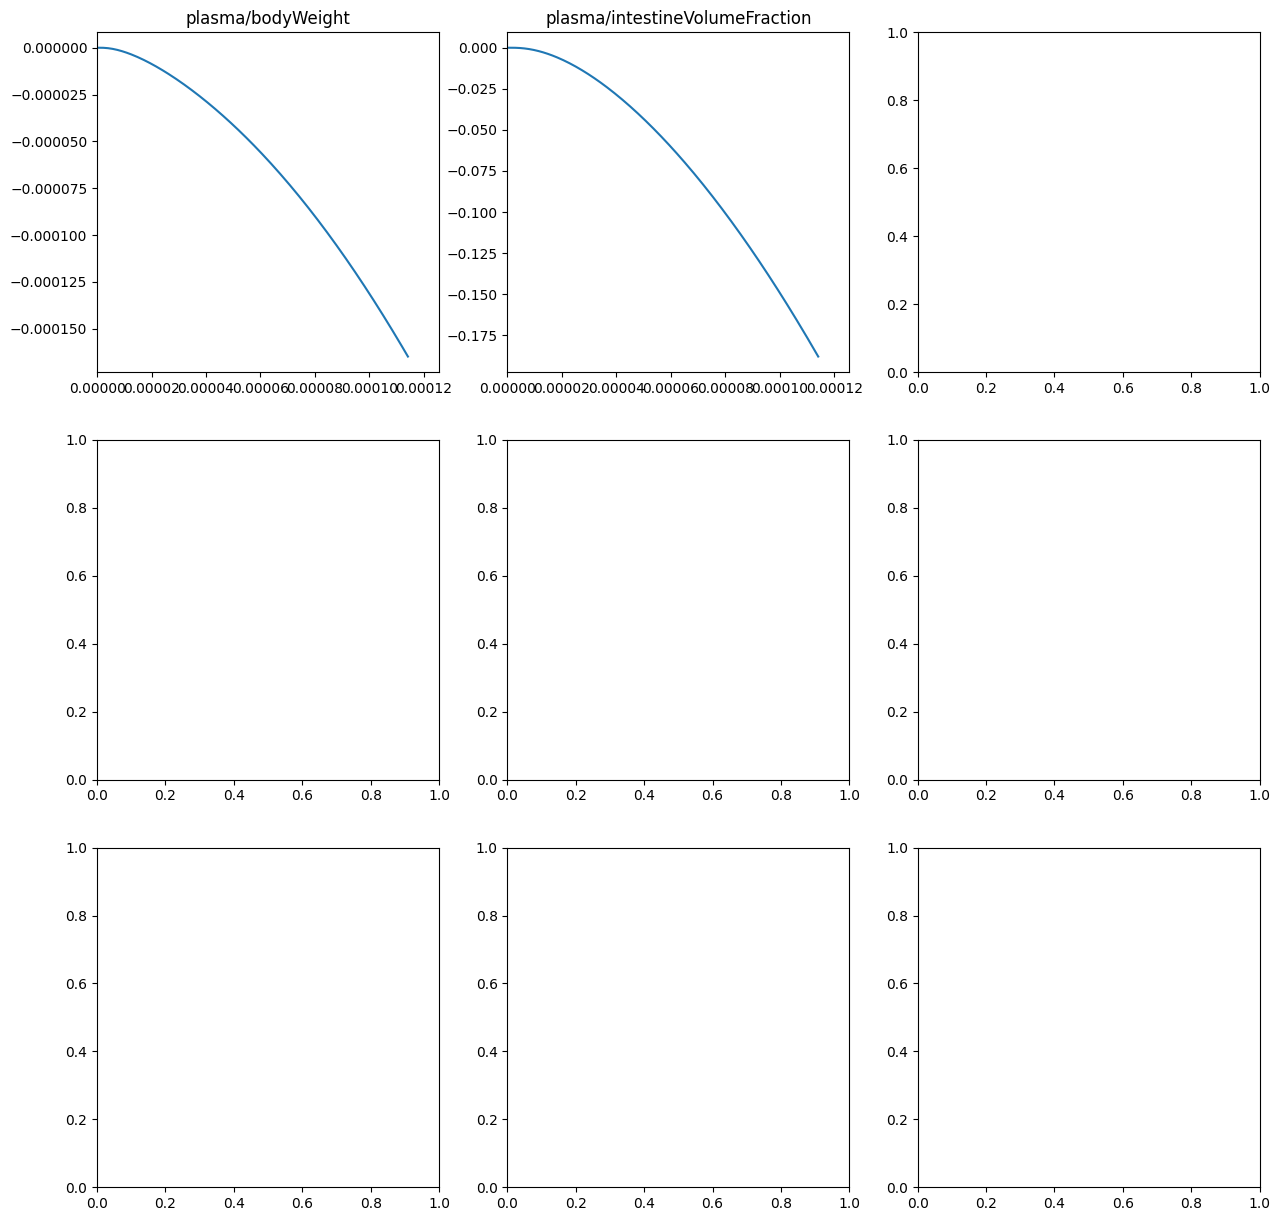

In [44]:
# #copy output of Thompson et al1
# merge solutions 
humanHG=os.path.join(fh,'temp','humanHG')
humanHGplusI=os.path.join(fh,'temp','humanHGplusI')
t,sol,se,sOut,qt,lut,lutSE,setup1=runSolver.loadSolutionFromDir(targetDir)
fig, axs = matplotlib.pyplot.subplots(3, 3,figsize=(15,15))
cName=['liverI']
cName=['plasma']
pName=['bodyWeight','intestineVolumeFraction','oralIngestion']

tscale=runSolver.getScale(setup)
max=[-1]*len(name)
for row in range(len(cName)):
    for col in range(len(pName)):
        #row=i//3
        #col=i%3
        try:
            fy=sOut[:,lut[cName[row]],lutSE[pName[col]]]
        except KeyError:
            print('Key {} not found'.format(pName[col]))
            continue
        ax=axs[row,col]
        ax.plot(qt/tscale,fy)
        #if max[i]>0:
        #    axs[row,col].set_ylim([0,max[i]])
        axs[row,col].set_xlim([0,1.1*tmax/tscale])
        axs[row,col].set_title('{}/{}'.format(cName[row],pName[col]))

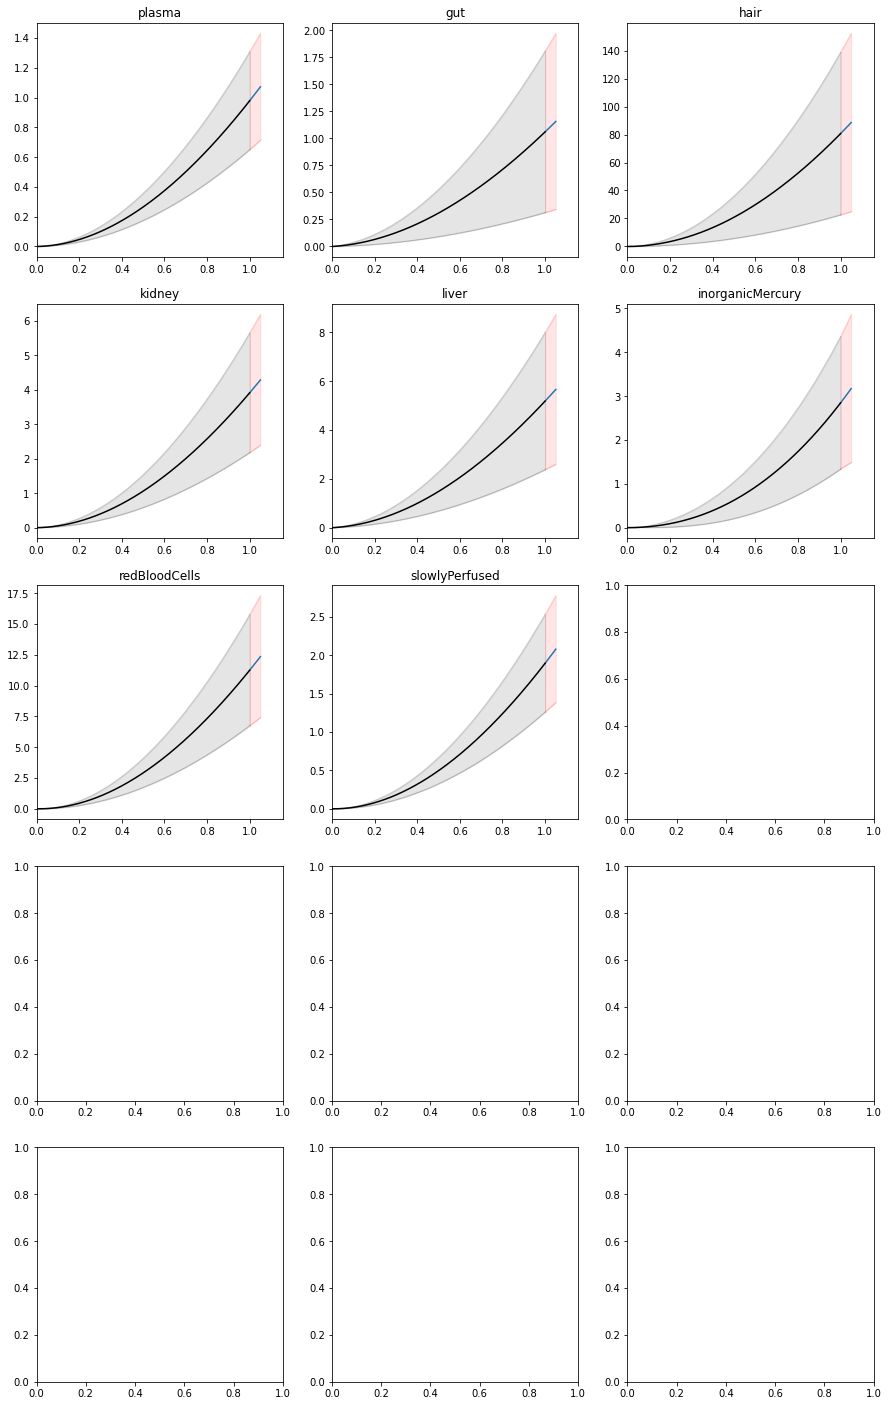

In [95]:
# #copy output of Thompson et al1
# merge solutions 
fig, axs = matplotlib.pyplot.subplots(5, 3,figsize=(15,25))
name=['arterial','adipose','brain','heart','kidney','liver','lung','muscle','skin',
      'splanchnic','stomach','testes','excrement']
name=['plasma','gut','hair','kidney','liver','inorganicMercury','redBloodCells','slowlyPerfused']

#diazepam
max=[1.5,2.6,3,4,5,2.5,6.8,1.5,1.5,4,4.2,3,25]
#cotinine
max=[9]*13
max[12]=90
max[2]=2

tscale=scale
max=[1000*x for x in max]
for i in range(len(name)):
    row=i//3
    col=i%3
    fy=sol[:,model.lut[name[i]]]
    fe=se[:,model.lut[name[i]]]
    fy1=solOld[:,model.lut[name[i]]]
    fe1=seOld[:,model.lut[name[i]]]
    ax=axs[row,col]
    ax.plot(t/tscale,fy)
    ax.plot(tOld/tscale,fy1,color='black')
    ax.fill_between(t/tscale, fy-fe, fy + fe, color='red',alpha=0.1)
    ax.plot(t/tscale,fy-fe,color='red',linewidth=1,alpha=0.2)
    ax.plot(t/tscale,fy+fe,color='red',linewidth=1,alpha=0.2)
    ax.fill_between(tOld/tscale, fy1-fe1, fy1 + fe1, color='black',alpha=0.1)
    ax.plot(tOld/tscale,fy1-fe1,color='black',linewidth=1,alpha=0.2)
    ax.plot(tOld/tscale,fy1+fe1,color='black',linewidth=1,alpha=0.2)
    axs[row,col].set_title(name[i])
    #axs[row,col].set_ylim([0,max[i]])
    axs[row,col].set_xlim([0,1.1*tmax/tscale])


In [ ]:
# #copy output of Thompson et al1
# draw just the errors
fig, axs = matplotlib.pyplot.subplots(3, 3,figsize=(15,25))
name=['arterial','adipose','brain','heart','kidney','liver','lung','muscle','skin',
      'splanchnic','stomach','testes','excrement']
name=['plasma','gut','hair','kidney','liver','inorganicMercury','redBloodCells','slowlyPerfused']

#diazepam
max=[1.5,2.6,3,4,5,2.5,6.8,1.5,1.5,4,4.2,3,25]
#cotinine
max=[9]*13
max[12]=90
max[2]=2

tscale=scale
max=[1000*x for x in max]
for i in range(len(name)):
    row=i//3
    col=i%3
    fe=se[:,model.lut[name[i]]]
    fe1=seOld[:,model.lut[name[i]]]
    ax=axs[row,col]
    ax.plot(t/tscale,fe)
    ax.plot(tOld/tscale,fe1,color='black')
    axs[row,col].set_title(name[i])
    #axs[row,col].set_ylim([0,max[i]])
    axs[row,col].set_xlim([0,1.1*tmax/tscale])


Drawing kHScaled 6/6


ValueError: x and y must have same first dimension, but have shapes (671,) and (1458,)

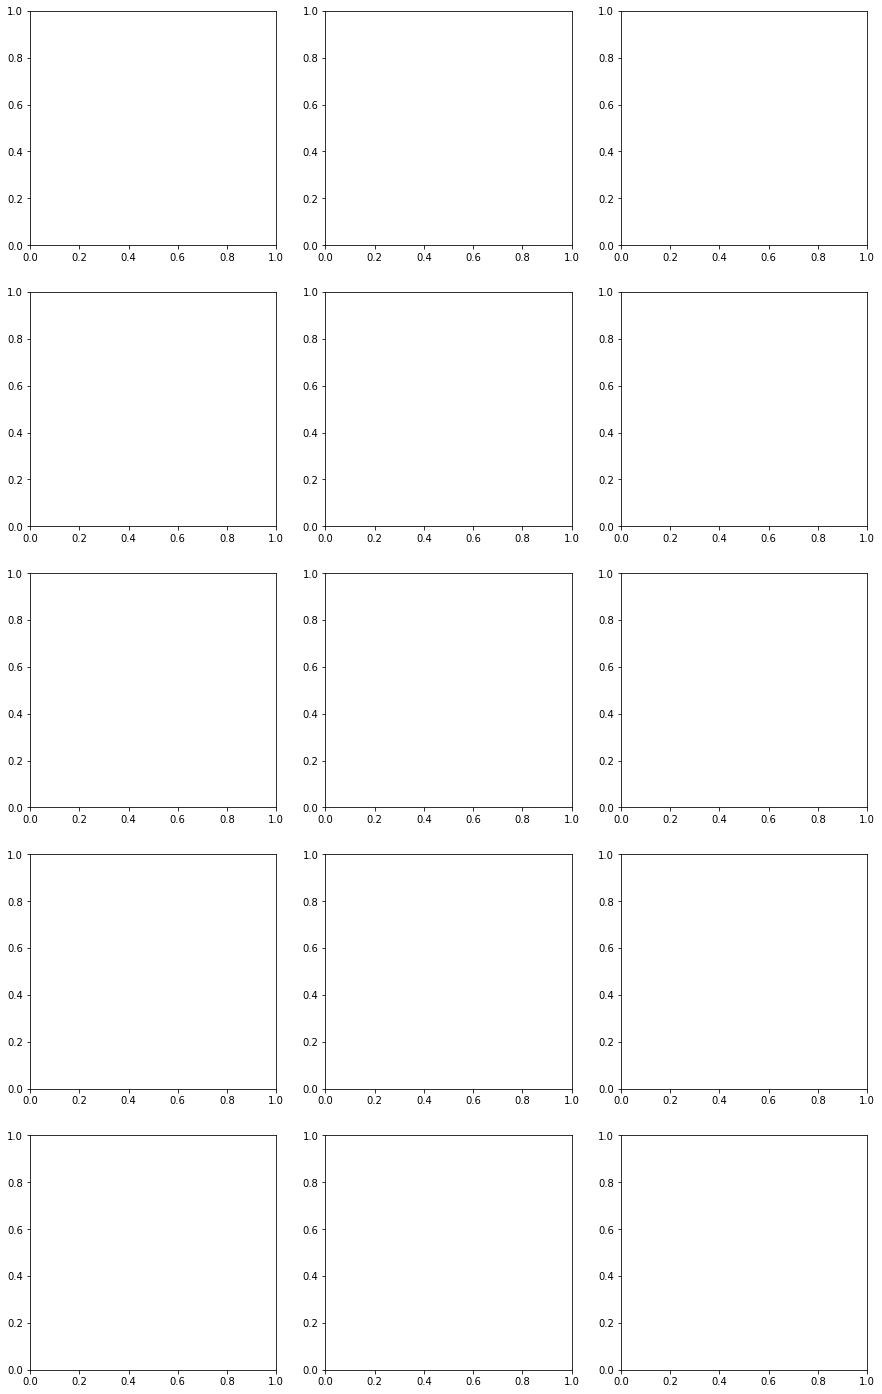

In [120]:
# #copy output of Thompson et al1
#draw error contributions
fig, axs = matplotlib.pyplot.subplots(5, 3,figsize=(15,25))
name=['arterial','adipose','brain','heart','kidney','liver','lung','muscle','skin',
      'splanchnic','stomach','testes','excrement']
name=['plasma','gut','hair','kidney','liver','redBloodCells','slowlyPerfused']

#diazepam
max=[1.5,2.6,3,4,5,2.5,6.8,1.5,1.5,4,4.2,3,25]
#cotinine
max=[9]*13
max[12]=90
max[2]=2

tscale=scale
ipar=6

for nm in model.lutSE:
    if model.lutSE[nm]==ipar:
        parName=nm
print('Drawing {} {}/{}'.format(parName,model.lutSE[parName],lutSE[parName]))
        
max=[1000*x for x in max]
for i in range(len(name)):
    row=i//3
    col=i%3
    fe=s1[:,model.lut[name[i]],model.lutSE[parName]]
    fe1=s1Old[:,lut[name[i]],lutSE[parName]]
    ax=axs[row,col]
    ax.plot(t/tscale,fe)
    ax.plot(qtOld/tscale,fe1,color='black')
    axs[row,col].set_title(name[i])
    #axs[row,col].set_ylim([0,max[i]])
    axs[row,col].set_xlim([0,1.1*tmax/tscale])


7


7440

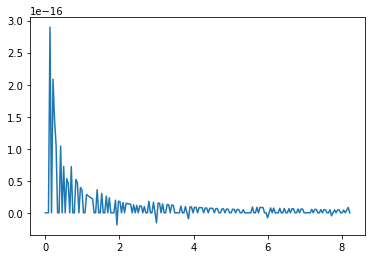

In [25]:
#gD=sys.get("hairGrowthDuration")
#print(gD['value']/60/24/365)
print(model.lut['slowlyPerfused'])
ft=[sys.fSS(x)[0,8,7] for x in qt]
#matplotlib.pyplot.imshow(sys.fSS(3e6)[0])
matplotlib.pyplot.plot(qt/tscale,ft)
30*248